In [1]:
import numpy as np
from netCDF4 import Dataset
import datetime
import glob
import os
import matplotlib.pyplot as plt
import cartopy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from regrid import regrid
import itertools
import cartopy.crs as ccrs
import tqdm
import pickle
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/phd/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [2]:
names = ['AWI','CPOM','LARM']
lats = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lat_25km.npy')
lons = np.load('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/auxiliary/lon_25km.npy')
datapath = '/Users/carmennab/Dropbox/met_office/data/freeboards/'
days = np.arange(0,212)
dates = [datetime.date(2016,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

means = []

### October
days = np.arange(0,32)
for count, name in enumerate(names):
    f = open(datapath+name+'/dailyFB_25km_2016-2017_season.pkl','rb')
    data = pickle.load(f)
    f.close()
    
    fbs = np.full((len(days),360,360),np.nan)
    for c,day in enumerate(days):
        date = dates[day].strftime('%Y%m%d')
        fbs[c] = data[date]
    fb = np.nanmean(fbs,axis=0)
    means.append(fb)

### April
days = np.arange(182,212)
for count, name in enumerate(names):
    f = open(datapath+name+'/dailyFB_25km_2016-2017_season.pkl','rb')
    data = pickle.load(f)
    f.close()
    
    fbs = np.full((len(days),360,360),np.nan)
    for c,day in enumerate(days):
        date = dates[day].strftime('%Y%m%d')
        fbs[c] = data[date]
    fb = np.nanmean(fbs,axis=0)
    means.append(fb)

In [3]:
plot = []
plot.append(means[0])
plot.append(means[1]-means[0])
plot.append(means[2]-means[0])
plot.append(means[3])
plot.append(means[4]-means[3])
plot.append(means[5]-means[3])

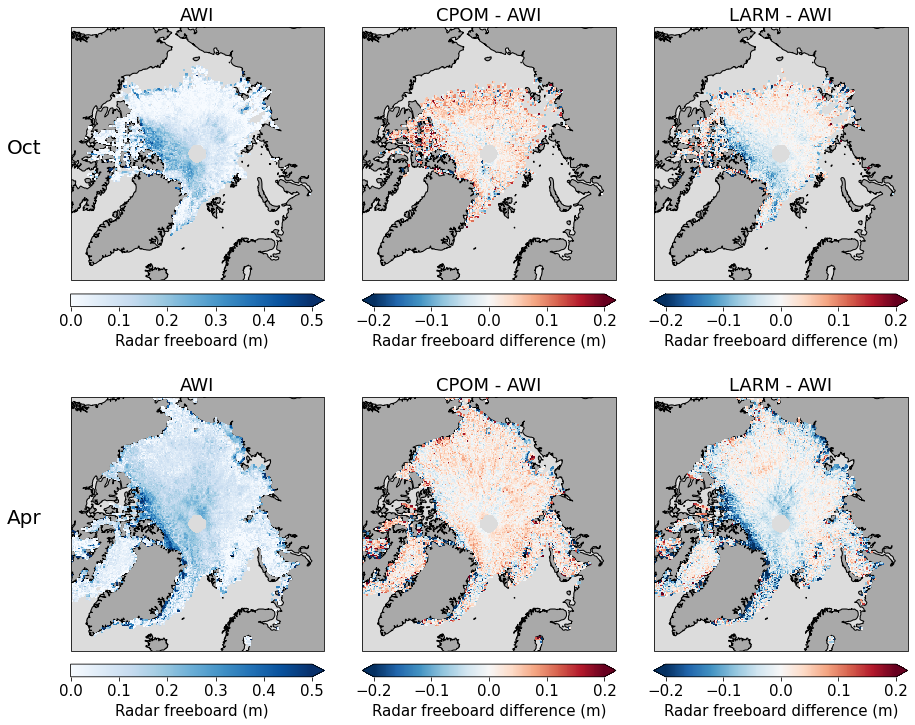

In [14]:
names = ['AWI','CPOM - AWI','LARM - AWI','AWI','CPOM - AWI','LARM - AWI']

fig = plt.figure(figsize=(15,13))
plt.rc('font', size=15)
spec = gridspec.GridSpec(ncols=3, nrows=2, hspace=0.1, wspace=0.15)

for count,plo in enumerate(plot):    
    ax = fig.add_subplot(spec[count],projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.coastlines()
    ax.set_title(names[count])

    if count in [0,3]:
        
        p_map = ax.pcolormesh(lons,lats,plo,cmap='Blues',vmin=0,vmax=0.5,transform=ccrs.PlateCarree())
        a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04, extend = 'max') 
        a.set_label('Radar freeboard (m)',fontsize='medium')  
    else:
        p_map = ax.pcolormesh(lons,lats,plo,cmap='RdBu_r',vmin=-0.2,vmax=0.2,transform=ccrs.PlateCarree()) 
        a = plt.colorbar(p_map,location="bottom",fraction=0.046, pad=0.04, extend = 'both') 
        a.set_label('Radar freeboard difference (m)',fontsize='medium')  
    
    if count == 0:
        ax.text(-0.25, 0.5, 'Oct', size=20, ha="left", transform=ax.transAxes)

    if count == 3:
        ax.text(-0.25, 0.5, 'Apr', size=20, ha="left", transform=ax.transAxes)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/main_figs/fb_maps.png',dpi=400, 
            bbox_inches="tight")